In [72]:
import face_recognition
import cv2
import os
import glob
import numpy as np
import random
import shutil
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# EDA

In [64]:
# Specify the root directory path
root_path = './dataset/'

# Collect all the person names
dir_names = os.listdir(root_path)
person_names = [name.split("_")[-1].title() for name in dir_names]
n_individuals = len(person_names)

print(f"Total number of individuals: {n_individuals}\n")
print(f"Name of the individuals : \n\t{person_names}")

Total number of individuals: 105

Name of the individuals : 
	['Adriana Lima', 'Alex Lawther', 'Alexandra Daddario', 'Alvaro Morte', 'Alycia Dabnem Carey', 'Amanda Crew', 'Amber Heard', 'Andy Samberg', 'Anne Hathaway', 'Anthony Mackie', 'Avril Lavigne', 'Barack Obama', 'Barbara Palvin', 'Ben Affleck', 'Bill Gates', 'Bobby Morley', 'Brenton Thwaites', 'Brian J. Smith', 'Brie Larson', 'Camila Mendes', 'Chris Evans', 'Chris Hemsworth', 'Chris Pratt', 'Christian Bale', 'Cristiano Ronaldo', 'Danielle Panabaker', 'Dominic Purcell', 'Dwayne Johnson', 'Eliza Taylor', 'Elizabeth Lail', 'Elizabeth Olsen', 'Ellen Page', 'Elon Musk', 'Emilia Clarke', 'Emma Stone', 'Emma Watson', 'Gal Gadot', 'Grant Gustin', 'Gwyneth Paltrow', 'Henry Cavil', 'Hugh Jackman', 'Inbar Lavi', 'Irina Shayk', 'Jake Mcdorman', 'Jason Momoa', 'Jeff Bezos', 'Jennifer Lawrence', 'Jeremy Renner', 'Jessica Barden', 'Jimmy Fallon', 'Johnny Depp', 'Josh Radnor', 'Katharine Mcphee', 'Katherine Langford', 'Keanu Reeves', 'Kiernen S

In [65]:
# Number of images available per person
n_images_per_person = [len(os.listdir(root_path + name)) for name in dir_names]
n_images = sum(n_images_per_person)

# Show
print(f"Total Number of Images : {n_images}.")

Total Number of Images : 525.


In [68]:
# Plot the Distribution of number of images per person.
fig = px.bar(x=person_names, y=n_images_per_person, color=person_names)
fig.update_layout({'title':{'text':"Distribution of number of images per person"}})
fig.show()

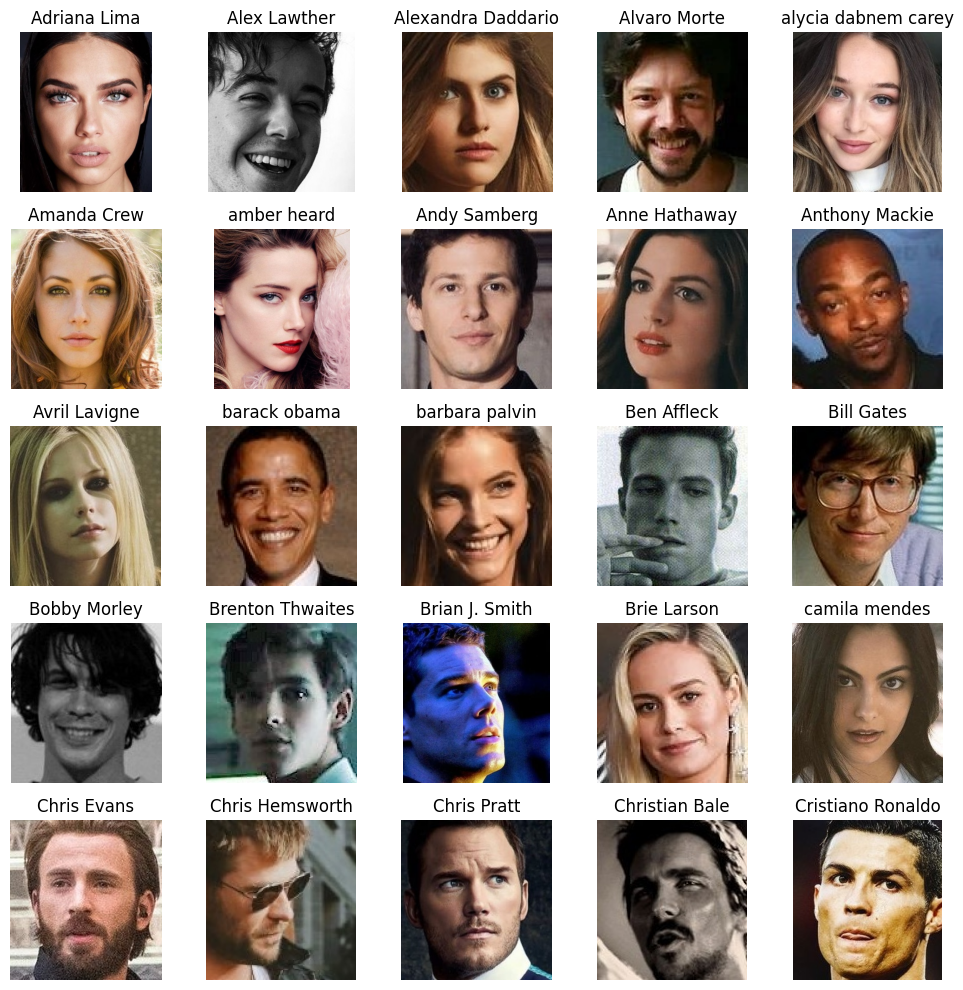

In [74]:
# Path to the dataset folder
dataset_path = "./dataset/"

# Set the number of rows and columns for the grid
rows, cols = 5, 5

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# Flatten the axes array to make it easier to index
axes = axes.flatten()

# Loop through each folder in the dataset folder
for i, folder_name in enumerate(os.listdir(dataset_path)):
    if i >= rows * cols:
        break  # Break out of the loop if we've displayed 25 images

    folder_path = os.path.join(dataset_path, folder_name)

    # Check if the item in the dataset folder is a directory
    if os.path.isdir(folder_path):
        # List all files in the folder
        files = os.listdir(folder_path)

        # Sort files to make sure they are in order
        files.sort()

        # Take the first file (assuming it's an image) and create its path
        image_path = os.path.join(folder_path, files[0])

        # Display the image on the current subplot
        img = mpimg.imread(image_path)
        axes[i].imshow(img)
        axes[i].set_title(f"{folder_name}")
        axes[i].axis("off")  # Turn off axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [75]:
# Path to the dataset_new folder
dataset_path = "./dataset/"

# Create a new folder for the selected images
output_folder = "./test_set"
os.makedirs(output_folder, exist_ok=True)

# Loop through each folder in the dataset_new folder
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)

    # Check if the item in the dataset folder is a directory
    if os.path.isdir(folder_path):
        # List all files in the folder
        files = os.listdir(folder_path)

        # Sort files to make sure they are in order
        files.sort()

        # Take the first two files (assuming they're images) and create their source paths
        source_paths = [os.path.join(folder_path, file) for file in files[:2]]

        # Create the destination paths for the selected images
        destination_paths = [os.path.join(output_folder, f"{folder_name}_{i + 1}.jpg") for i in range(2)]

        # Copy the selected images to the new folder
        for source_path, destination_path in zip(source_paths, destination_paths):
            shutil.copyfile(source_path, destination_path)

print("Selected images have been copied to the 'test_set' folder.")


Selected images have been copied to the 'test_set' folder.


In [76]:
# Path to the dataset_new folder
dataset_path = "./dataset/"

# Create a new folder for the selected images
output_folder = "./validation_set"
os.makedirs(output_folder, exist_ok=True)

# Loop through each folder in the dataset_new folder
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)

    # Check if the item in the dataset folder is a directory
    if os.path.isdir(folder_path):
        # List all files in the folder
        files = os.listdir(folder_path)

        # Sort files to make sure they are in order
        files.sort()

        # Take the first file (assuming it's an image) and create its source path
        source_path = os.path.join(folder_path, files[3])

        # Create the destination path for the selected image
        destination_path = os.path.join(output_folder, f"{folder_name}.jpg")

        # Copy the selected image to the new folder
        shutil.copyfile(source_path, destination_path)

print("Selected images have been copied to the 'validation_set' folder.")

Selected images have been copied to the 'validation_set' folder.


In [77]:
class FaceRec:
    def __init__(self):
        self.known_face_encodings = []
        self.known_face_names = []

        # Resize frame for faster processing
        self.frame_resizing = 0.25

    def load_encoding_images(self, images_path):
        images_path = glob.glob(os.path.join(images_path, "*.*"))

        print("{} encoding images found.".format(len(images_path)))

        for img_path in images_path:
            try:
                img = cv2.imread(img_path)
                rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                filename = os.path.splitext(os.path.basename(img_path))[0]

        # Get encoding only if a face is detected
                face_encodings = face_recognition.face_encodings(rgb_img)
                if face_encodings:
                    img_encoding = face_encodings[0]

                    self.known_face_encodings.append(img_encoding)
                    self.known_face_names.append(filename)
                else:
                    print(f"No face detected in {img_path}")
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

        print("Encoding images loaded")


    def detect_known_faces(self, frame):
        small_frame = cv2.resize(frame, (0, 0), fx=self.frame_resizing, fy=self.frame_resizing)
        rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            matches = face_recognition.compare_faces(self.known_face_encodings, face_encoding)
            name = "Unknown"

            face_distances = face_recognition.face_distance(self.known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = self.known_face_names[best_match_index]
            face_names.append(name)

        # Adjust coordinates with frame resizing
        face_locations = (np.array(face_locations) / self.frame_resizing).astype(int)
        return face_locations, face_names

In [62]:
# Create FaceRec instance
sfr = FaceRec()

# Load known face encodings from a folder
sfr.load_encoding_images("./test_set/")

315 encoding images found.
No face detected in ./test_set\Alex Lawther.jpg
No face detected in ./test_set\Alex Lawther_1.jpg
No face detected in ./test_set\Anne Hathaway_2.jpg
No face detected in ./test_set\Bill Gates.jpg
No face detected in ./test_set\Bill Gates_1.jpg
No face detected in ./test_set\elon musk.jpg
No face detected in ./test_set\elon musk_1.jpg
No face detected in ./test_set\Henry Cavil.jpg
No face detected in ./test_set\Henry Cavil_1.jpg
No face detected in ./test_set\Millie Bobby Brown.jpg
No face detected in ./test_set\Millie Bobby Brown_1.jpg
No face detected in ./test_set\Rami Malek_2.jpg
Encoding images loaded


In [63]:
# Create FaceRec instance
sfr = FaceRec()

# Load known face encodings from a folder
sfr.load_encoding_images("./validation_set/")

105 encoding images found.
Encoding images loaded


In [55]:
# Load Camera
cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()

    # Detect Faces
    face_locations, face_names = sfr.detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
        y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]

        cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)

    cv2.imshow("Frame", frame)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()